In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [249]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
dataset = pd.read_csv(r"D:\mlops_hotel_booking_pred\archive (1)\booking.csv")

In [251]:
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [252]:
train , test = train_test_split( dataset , test_size=0.2 , train_size=0.8 , random_state=42)

In [253]:
train

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,INN00388,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,INN07769,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,INN11793,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,INN07979,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,INN10671,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,55.0,2,12/26/2017,Not_Canceled
6265,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,Online,0,0,0,80.0,0,10/16/2017,Canceled
11284,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,Corporate,0,0,0,110.0,1,5/24/2018,Not_Canceled
860,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,Online,0,0,0,130.0,0,6/7/2018,Canceled


In [254]:
test

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled
14981,INN14982,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,Online,0,0,0,1.00,0,2/28/2018,Not_Canceled
18392,INN18393,2,0,1,0,Meal Plan 1,0,Room_Type 1,141,Offline,0,0,0,90.00,0,9/20/2017,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19588,INN19589,2,0,0,2,Meal Plan 1,0,Room_Type 4,186,Online,0,0,0,118.80,1,8/10/2018,Canceled
5010,INN05011,2,0,0,1,Not Selected,0,Room_Type 1,12,Online,0,0,0,79.00,0,2/23/2018,Canceled
9986,INN09987,2,0,2,4,Meal Plan 1,0,Room_Type 1,28,Online,0,0,0,131.60,0,4/29/2018,Canceled
33253,INN33254,2,0,0,1,Not Selected,0,Room_Type 1,2,Online,0,0,0,81.00,0,1/26/2018,Not_Canceled


In [255]:
train.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='str')

In [256]:
train.drop(columns=["Booking_ID"] , inplace=True)

In [257]:
train.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


In [258]:
train.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [259]:
train.duplicated().sum()

np.int64(7699)

In [260]:
train.drop_duplicates(inplace=True)

In [261]:
train.shape

(21329, 16)

In [262]:
train.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [263]:
train["number of adults"].value_counts()

number of adults
2    15487
1     3990
3     1726
0      114
4       12
Name: count, dtype: int64

In [264]:
train["number of children"].value_counts()

number of children
0     19225
1      1231
2       857
3        13
9         2
10        1
Name: count, dtype: int64

In [265]:
train["number of week nights"].value_counts()

number of week nights
2     5929
1     5796
3     4640
4     1972
0     1460
5     1170
6      138
7       78
8       46
10      40
9       25
11      10
15       8
12       7
14       4
13       3
17       2
16       1
Name: count, dtype: int64

In [266]:
train["number of weekend nights"].value_counts()

number of weekend nights
0    9118
1    6078
2    5897
3     116
4      86
5      20
6      13
7       1
Name: count, dtype: int64

In [267]:
train["type of meal"].value_counts()

type of meal
Meal Plan 1     16775
Not Selected     3592
Meal Plan 2       957
Meal Plan 3         5
Name: count, dtype: int64

In [268]:
train["lead time"].value_counts()

lead time
0      933
1      697
2      476
3      456
4      452
      ... 
311      1
355      1
333      1
350      1
331      1
Name: count, Length: 349, dtype: int64

In [269]:
train["average price"].value_counts()

average price
65.00     420
0.00      388
75.00     341
85.00     281
95.00     271
         ... 
116.62      1
114.66      1
159.08      1
79.85       1
127.15      1
Name: count, Length: 3500, dtype: int64

In [270]:
train["booking status"].value_counts()

booking status
Not_Canceled    15210
Canceled         6119
Name: count, dtype: int64

DATA IS QUIET IMBALANCED

In [271]:
train.columns


Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [272]:
categorical_cols = [
    "type of meal" , "car parking space" , "room type" , "market segment type" , "repeated" , "booking status" 
]

In [273]:
numerical_cols = [
    "number of adults" , "number of children" , "number of weekend nights" , "number of week nights" , "lead time" , "average price" , "P-C" , "P-not-C"
]

DATA ANALYSIS

In [274]:
df_copy = train.copy()

In [275]:
df_copy.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


UNIVARIATE ANALYSIS

In [276]:
def num_plot_dist(train , numerical_cols):
    fig , axes = plt.subplots(len(numerical_cols) , 2 , figsize=(15 , len( numerical_cols)*5))
    if len(numerical_cols) == 1:
        axes = [axes]
    for i  , column in enumerate(numerical_cols):
        sns.histplot( data = train , x = column , ax = axes[i][0] , kde=True , palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot( data = train , x  = column , ax = axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")


    plt.tight_layout()
    plt.show()

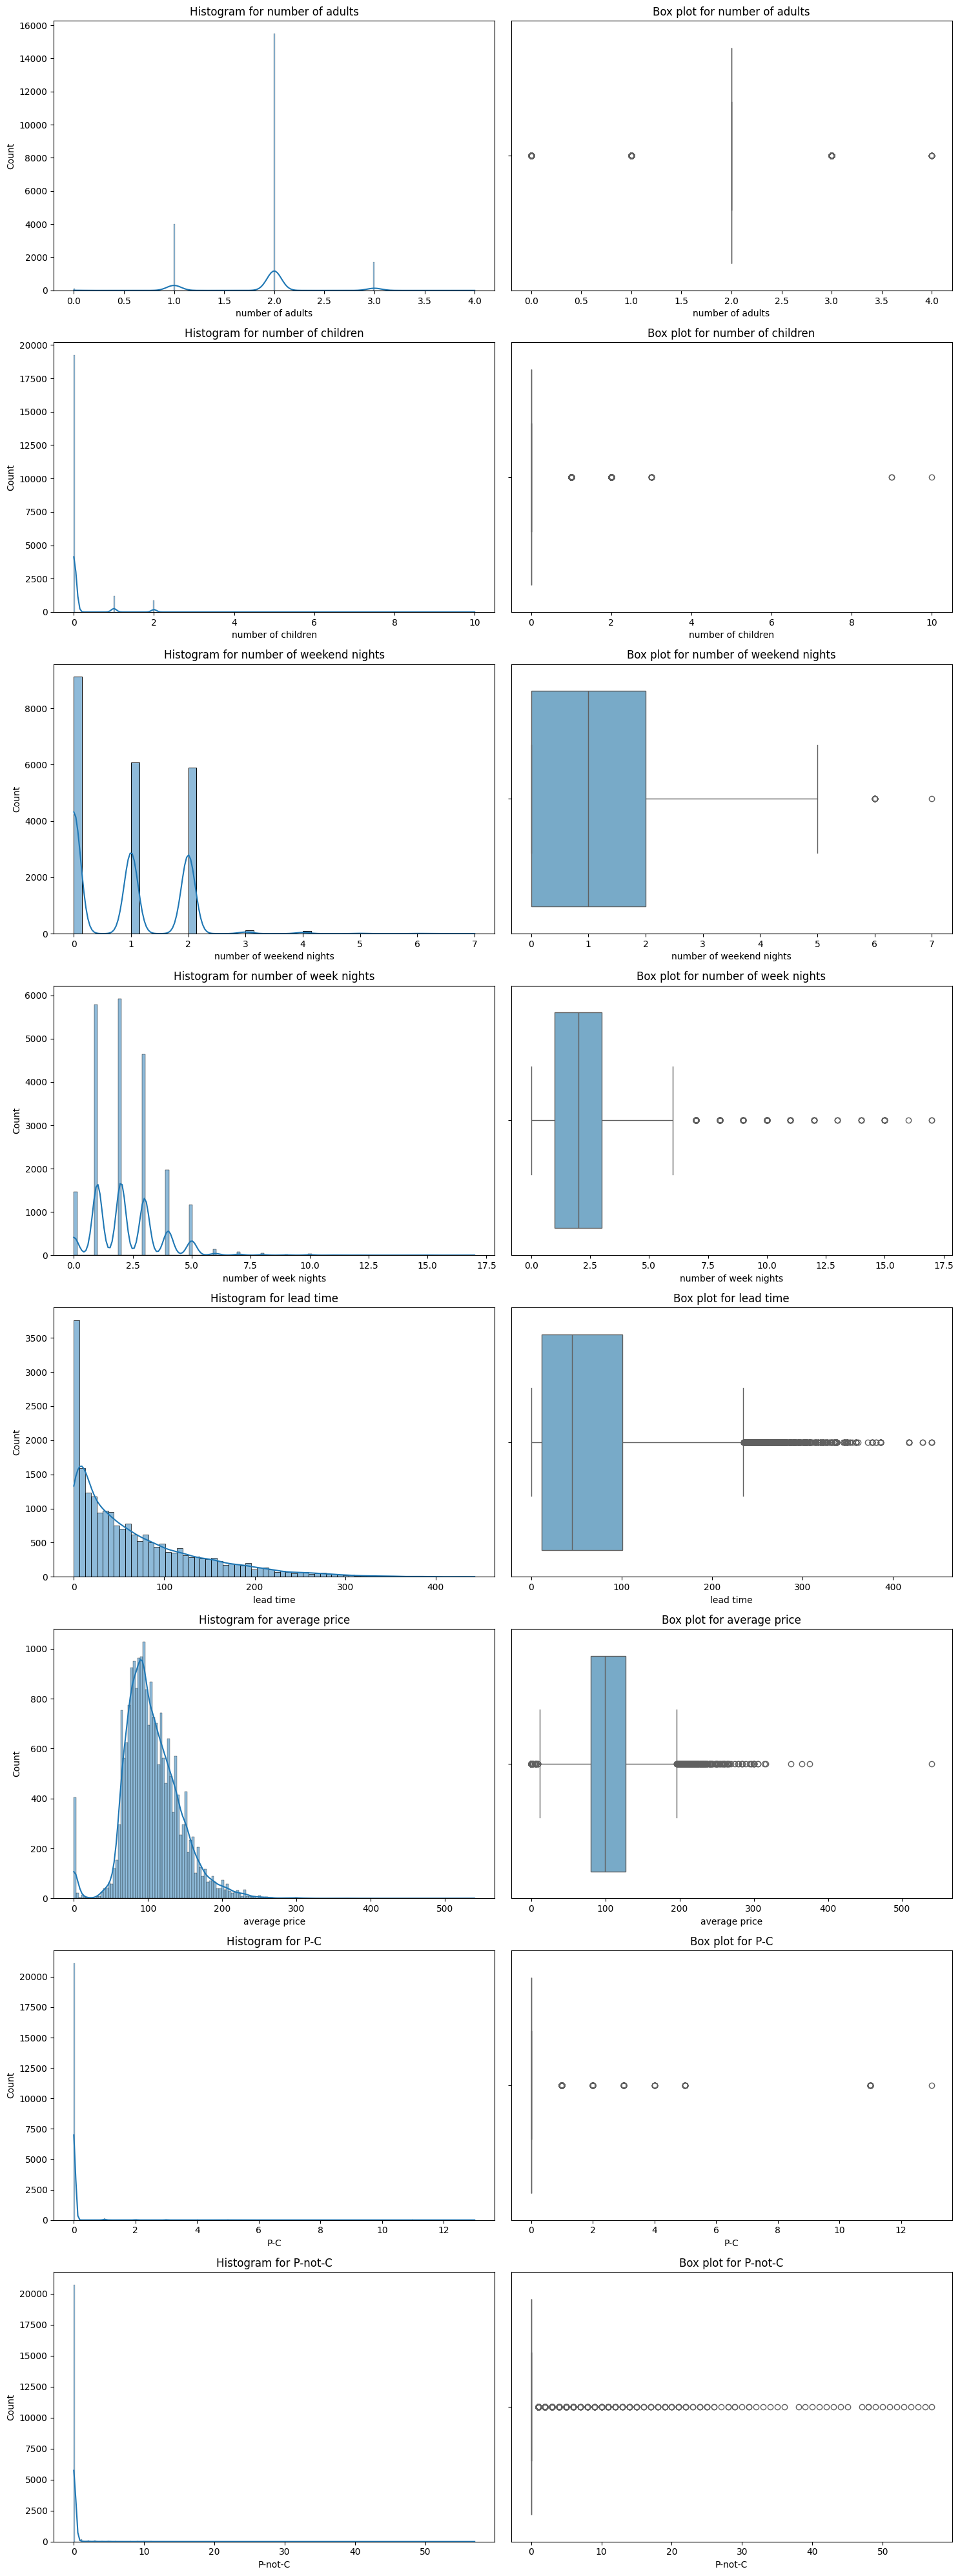

In [277]:
num_plot_dist(df_copy , numerical_cols=numerical_cols)

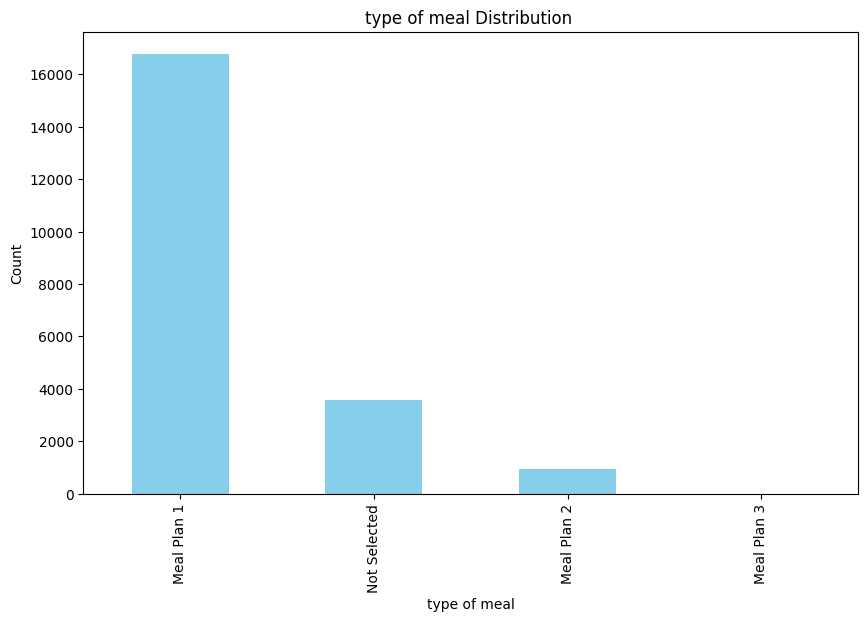

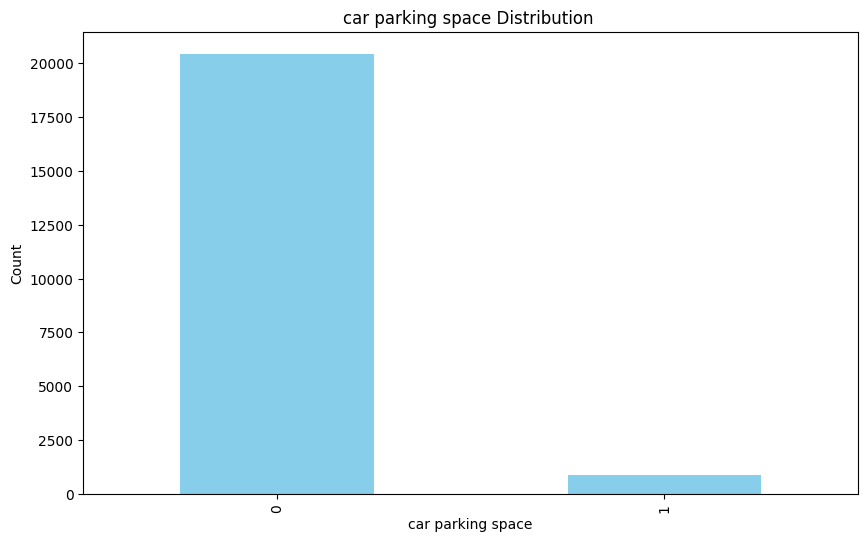

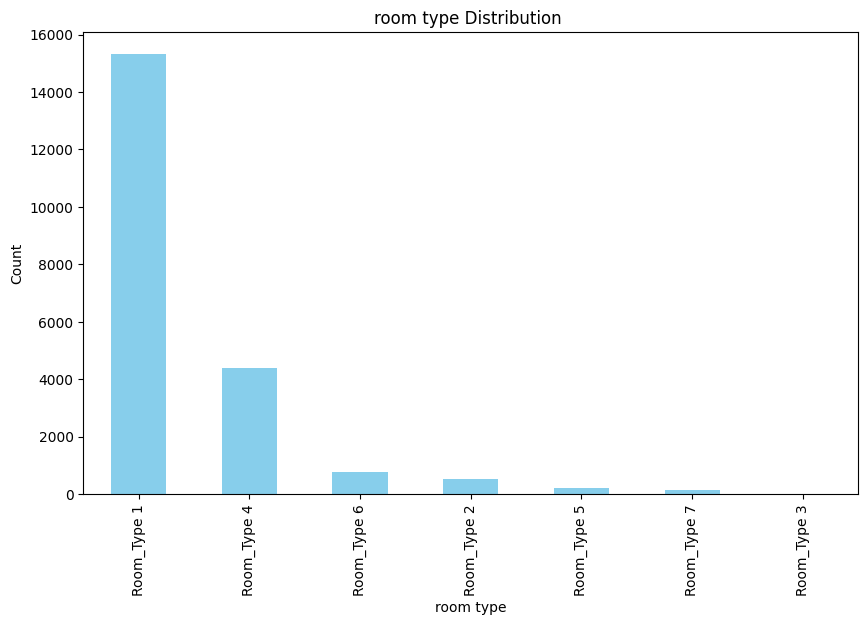

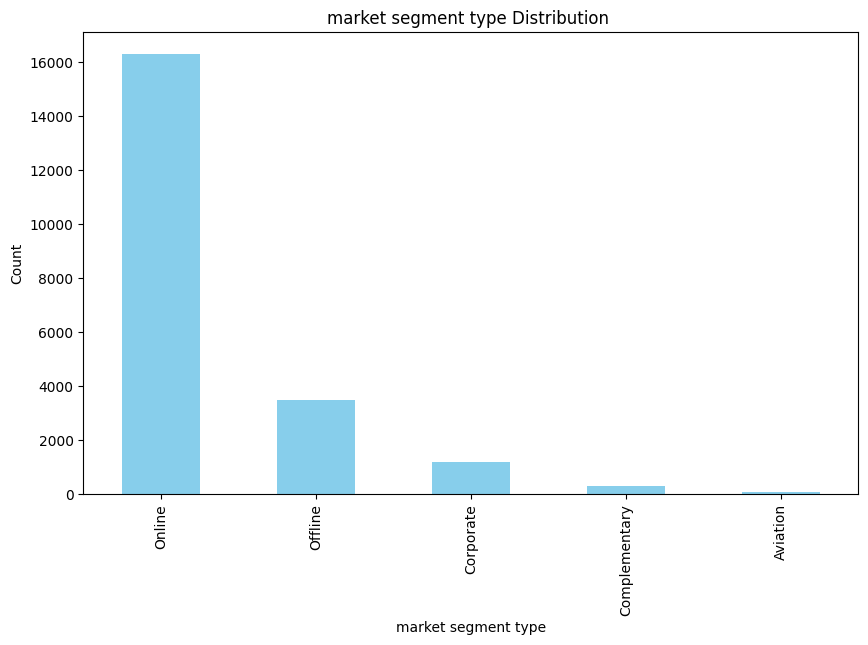

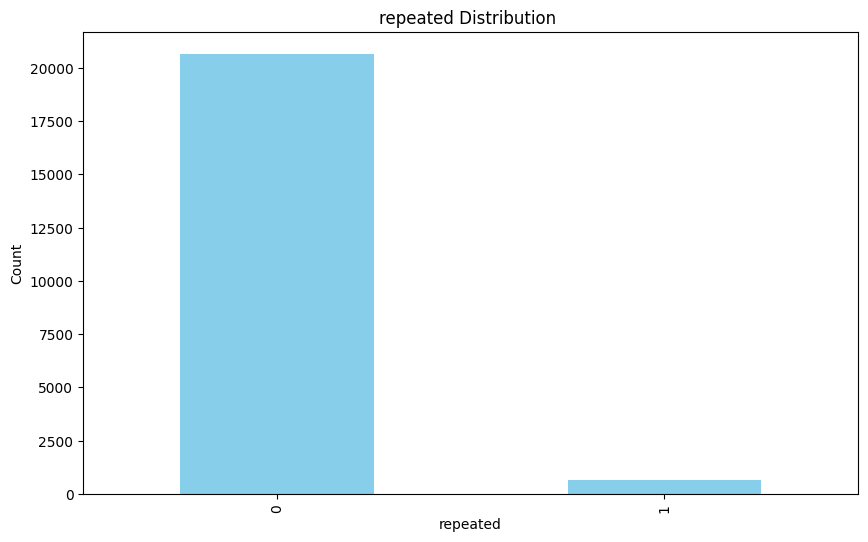

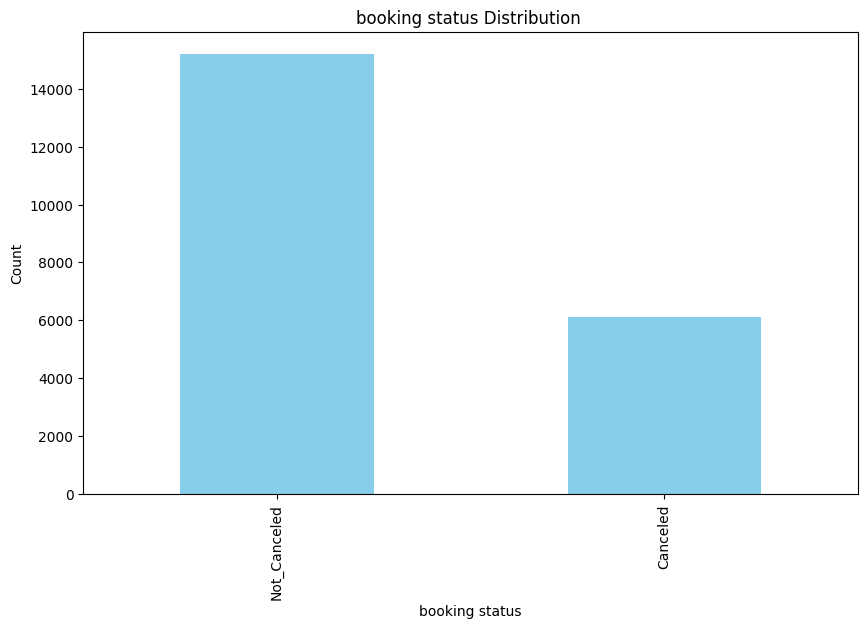

In [278]:
for cat_feature in categorical_cols:
    if cat_feature in df_copy.columns:  # Add this check
        plt.figure(figsize=(10,6))
        df_copy[cat_feature].value_counts().plot(kind="bar", color="skyblue")
        plt.title(f"{cat_feature} Distribution ")
        plt.xlabel(cat_feature)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Column '{cat_feature}' not found in dataframe")

BIVARIATE ANALYSIS

In [279]:
def plot_bivariate_num( df_copy , target , numerical_cols):
    num_plots = len(numerical_cols)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots( num_rows , 2 , figsize=( 15 , num_rows*5))
    axes=axes.flatten()
    for i , column in enumerate( numerical_cols ):
        sns.boxplot( data = df_copy , x = target , y = column , palette="Blues"  , ax= axes[i])
        axes[i].set_title(f"{column} vs  {target}")

    plt.tight_layout()
    plt.show()

In [280]:
df_copy.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [281]:
df_copy.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


In [282]:
# Convert numerical columns to proper numeric types
numerical_cols = ['number of adults', 'number of children', 'number of weekend nights', 
                  'number of week nights', 'lead time', 'repeated', 'P-C', 'P-not-C', 
                  'average price', 'special requests']

for col in numerical_cols:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

In [283]:
# Check data types
print("Data types:")
print(df_copy[numerical_cols].dtypes)

# Check sample values
print("\nSample values:")
print(df_copy[numerical_cols].head())

# Check if there are any non-numeric values
print("\nChecking for non-numeric values:")
for col in numerical_cols:
    print(f"{col}: {df_copy[col].dtype}")

Data types:
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
lead time                     int64
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
dtype: object

Sample values:
       number of adults  number of children  number of weekend nights  \
387                   3                   0                         1   
7768                  1                   0                         2   
11792                 2                   0                         1   
7978                  1                   0                         0   
10670                 2                   2                         1   

       number of week nights  lead time  repeated  P-C  P-not-C  \
387                        3        155         0    0        0   
7768                     

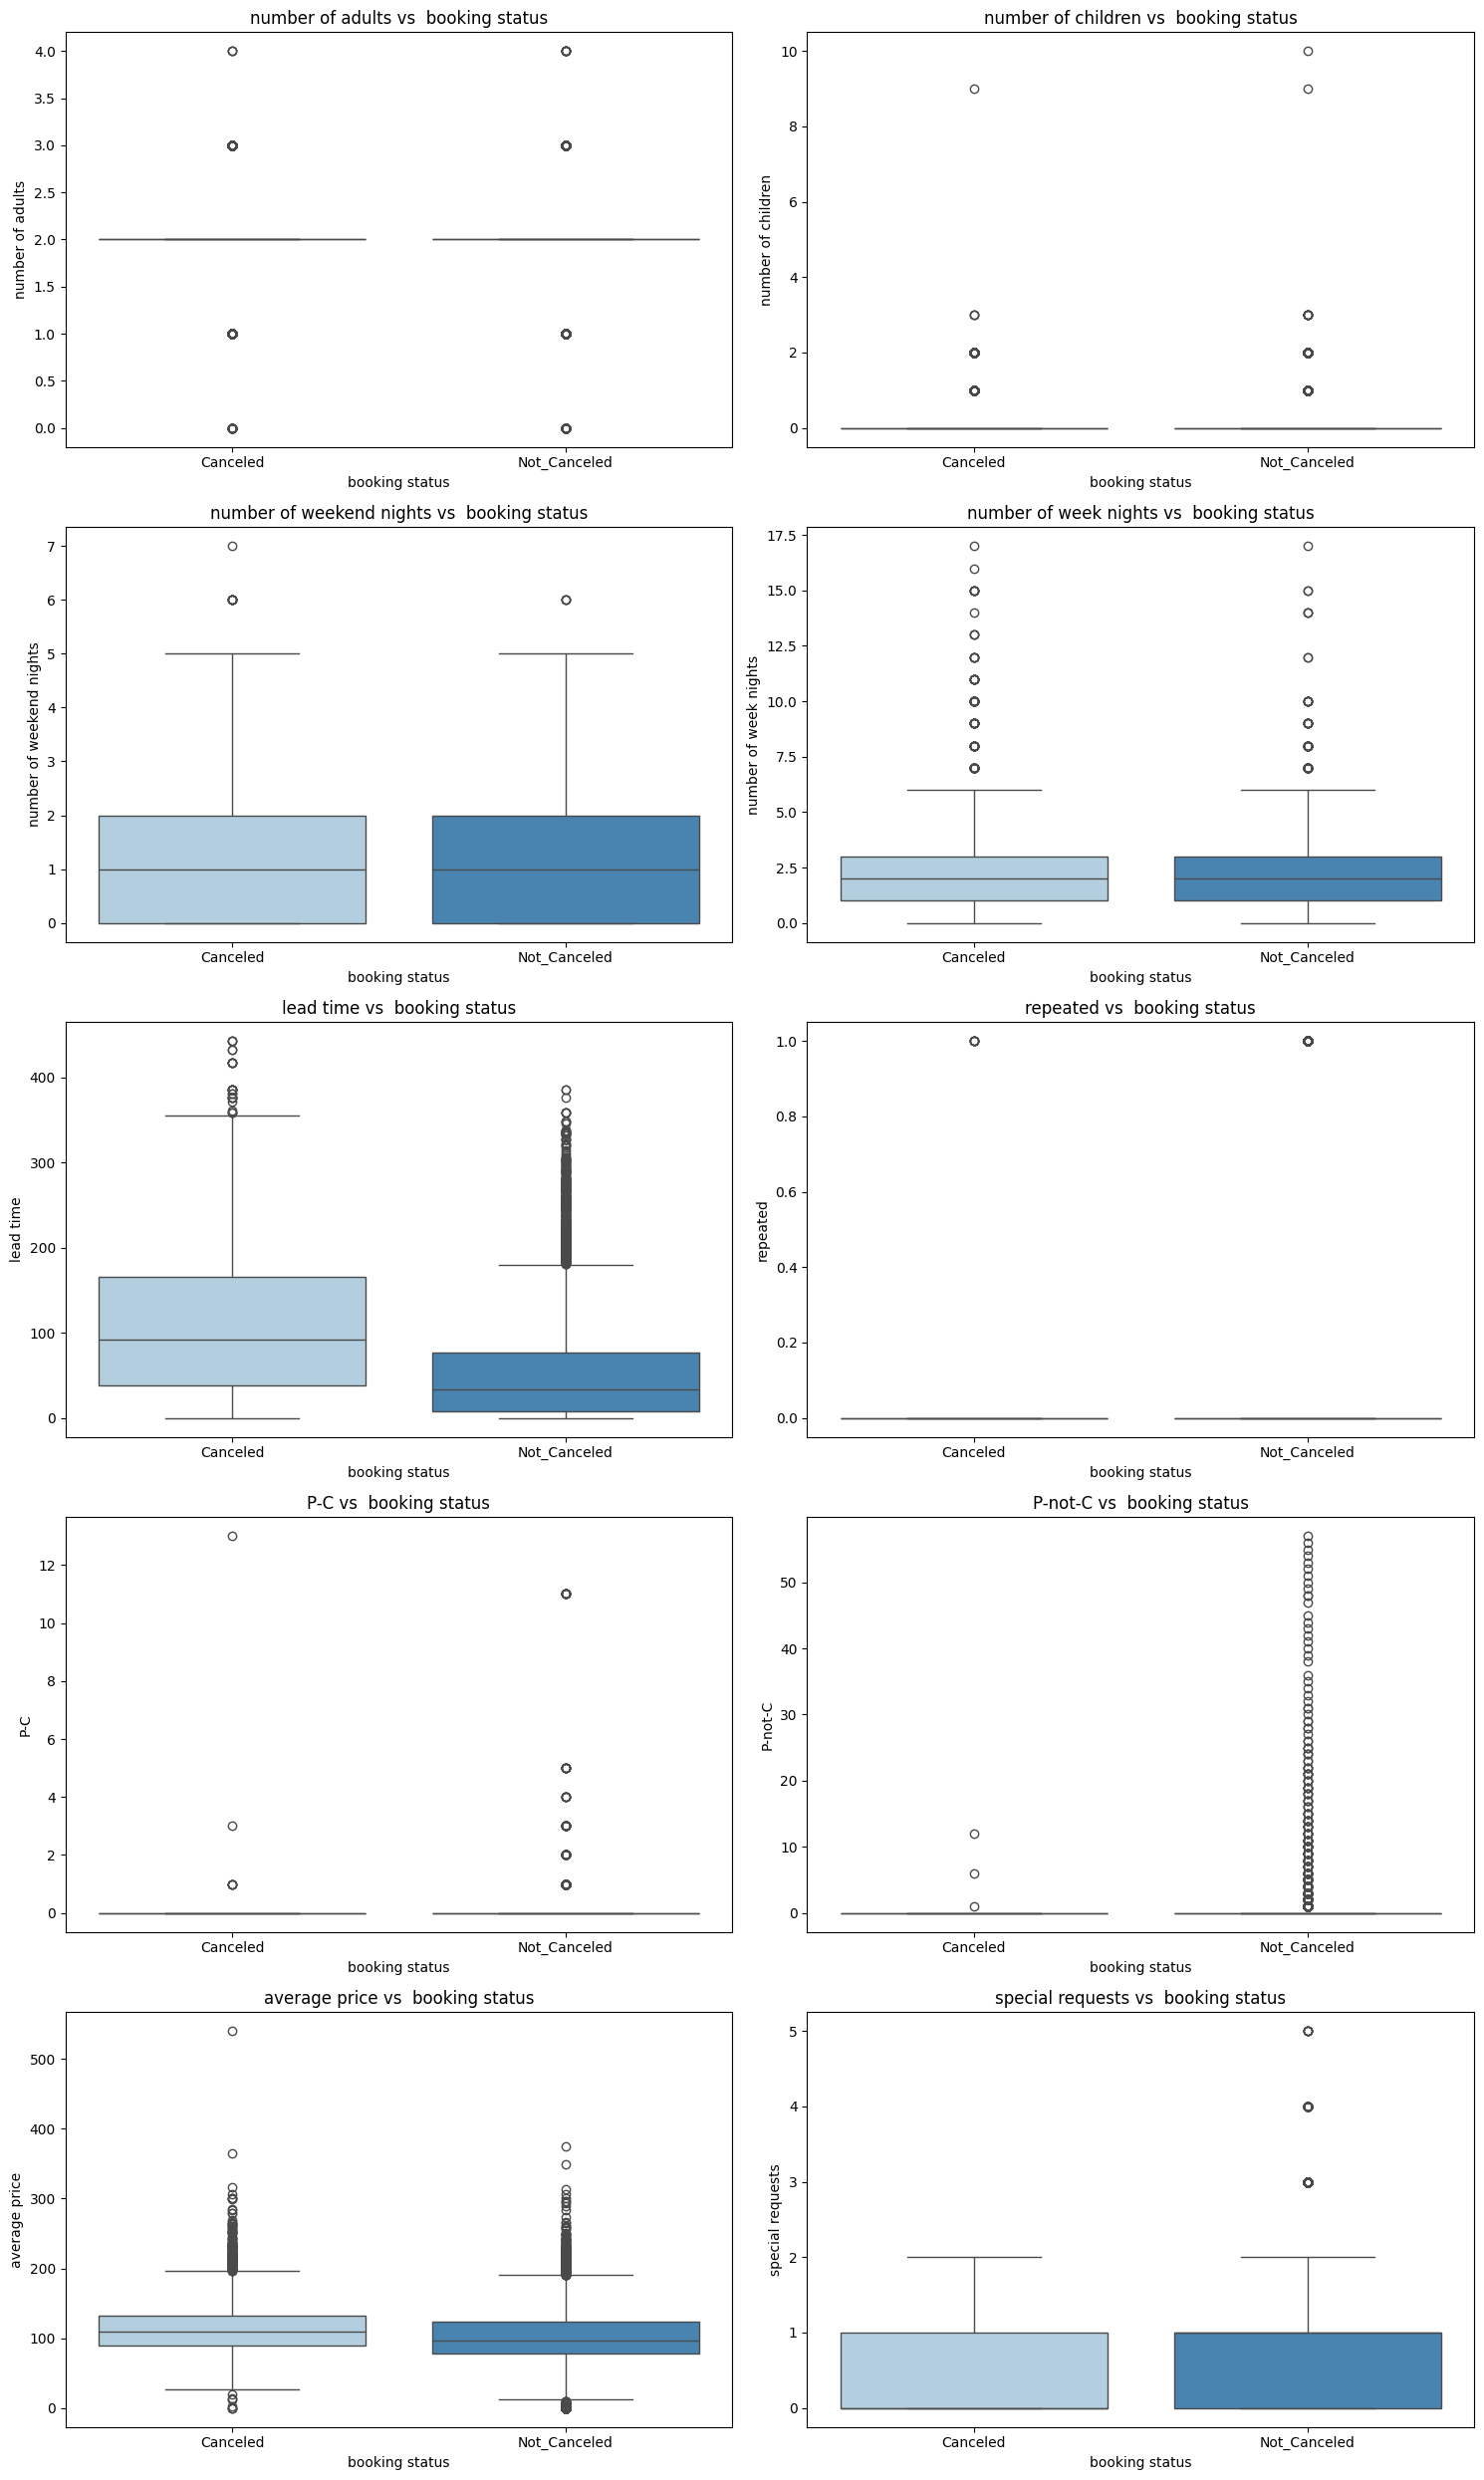

In [284]:
plot_bivariate_num(df_copy, "booking status", numerical_cols)

In [285]:
df_copy.columns 

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [286]:
df_copy["market segment type"]

387       Online
7768      Online
11792    Offline
7978      Online
10670     Online
          ...   
1685      Online
16023     Online
21962     Online
16850    Offline
15795     Online
Name: market segment type, Length: 21329, dtype: str

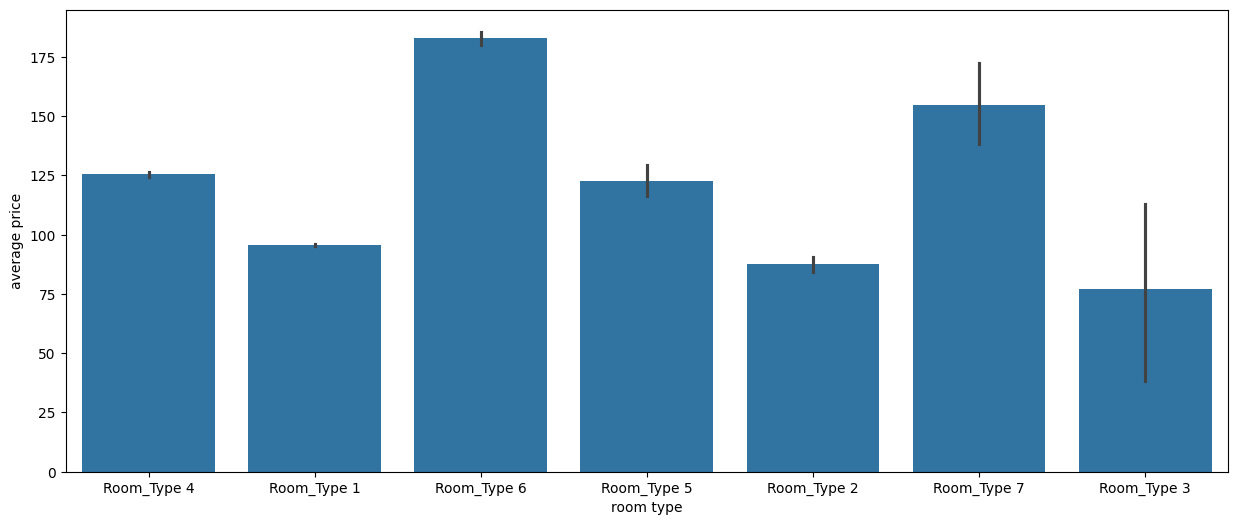

In [287]:
plt.figure( figsize=(15,6))
sns.barplot( x = "room type" , y = "average price" , data = df_copy)
plt.show()

In [288]:
def plot_bivariate_cat( df_copy , target ,  categorical_cols):
    num_plots = len(categorical_cols)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots( num_rows , 2 , figsize=( 15 , num_rows*5))
    axes=axes.flatten()
    for i , feature in enumerate( categorical_cols ):
        sns.countplot( x = feature , hue  = target , data = df_copy , palette="Set2", ax = axes[i] )
        axes[i].set_title(f"{feature} vs  {target}")
        axes[i].tick_params( axis = 'x' , rotation = 90 )

    plt.tight_layout()
    plt.show()

In [289]:
categorical_cols

['type of meal',
 'car parking space',
 'room type',
 'market segment type',
 'repeated',
 'booking status']

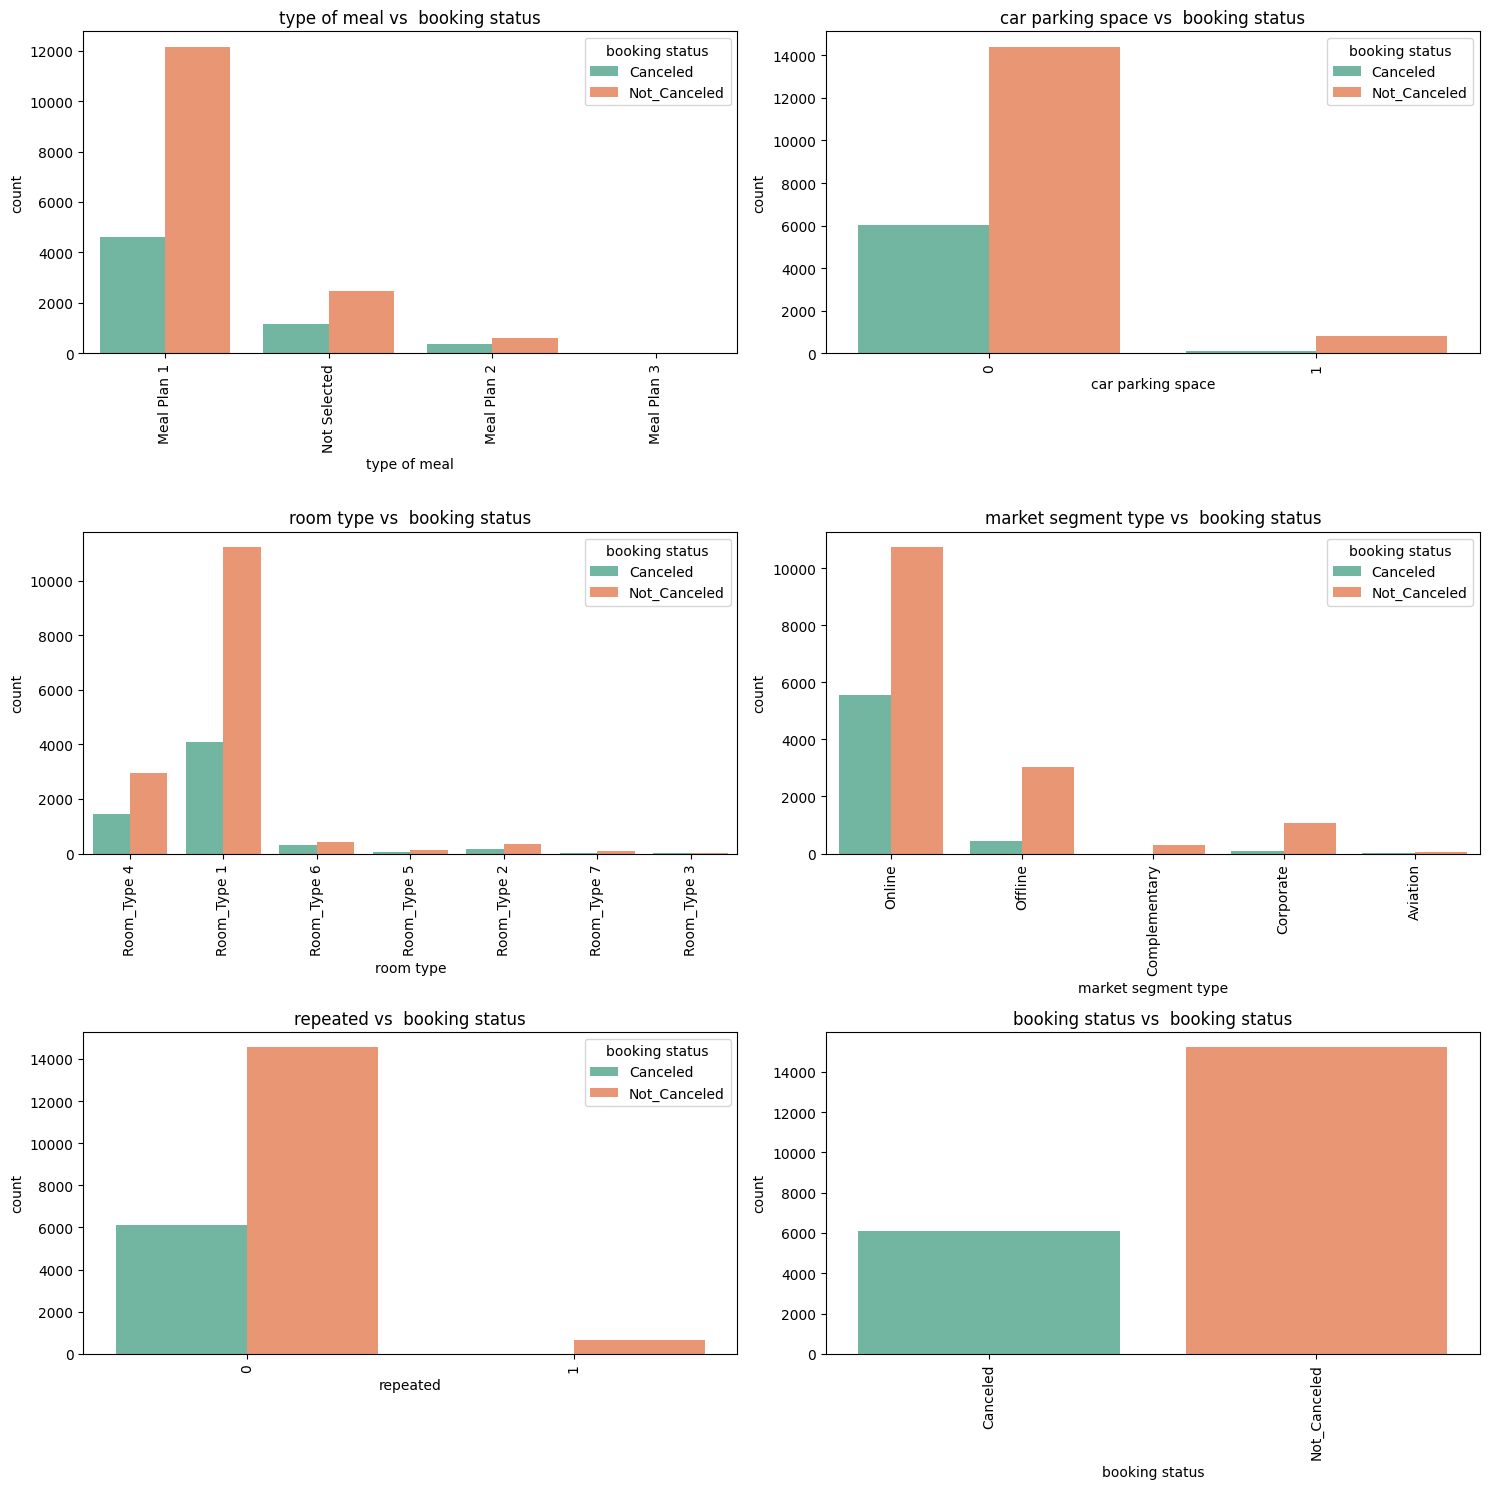

In [290]:
plot_bivariate_cat( df_copy , "booking status" , categorical_cols)

PROCESSING

In [291]:
train.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


In [292]:
train.info()

<class 'pandas.DataFrame'>
Index: 21329 entries, 387 to 15795
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          21329 non-null  int64  
 1   number of children        21329 non-null  int64  
 2   number of weekend nights  21329 non-null  int64  
 3   number of week nights     21329 non-null  int64  
 4   type of meal              21329 non-null  str    
 5   car parking space         21329 non-null  int64  
 6   room type                 21329 non-null  str    
 7   lead time                 21329 non-null  int64  
 8   market segment type       21329 non-null  str    
 9   repeated                  21329 non-null  int64  
 10  P-C                       21329 non-null  int64  
 11  P-not-C                   21329 non-null  int64  
 12  average price             21329 non-null  float64
 13  special requests          21329 non-null  int64  
 14  date of reservation 

In [293]:
from sklearn.preprocessing import LabelEncoder


In [294]:
label_encoder = LabelEncoder()

In [295]:
mappings = {}
for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

    mappings[col] = { label:code for label , code in zip( label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [296]:
mappings

{'type of meal': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'car parking space': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'room type': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market segment type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

MULTICOLLINEARITY

In [297]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.tools import add_constant

In [299]:
X = add_constant(train)
vif_data = pd.DataFrame()

In [300]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])


In [301]:
vif_data["festures"] = X_numeric.columns

In [302]:
vif_data

,festures
0,const
1,number of adults
2,number of children
3,number of weekend nights
4,number of week nights
5,type of meal
6,car parking space
7,room type
8,lead time
9,market segment type


In [303]:
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values , i ) for i in range(X_numeric.shape[1])]

In [304]:
vif_data

,festures,VIF
0,const,59.222714
1,number of adults,1.327773
2,number of children,1.280494
3,number of weekend nights,1.071817
4,number of week nights,1.121085
5,type of meal,1.144469
6,car parking space,1.033246
7,room type,1.551776
8,lead time,1.293443
9,market segment type,1.660687


DATSET DOESNOT HAVE MULTICOLLINEARITY

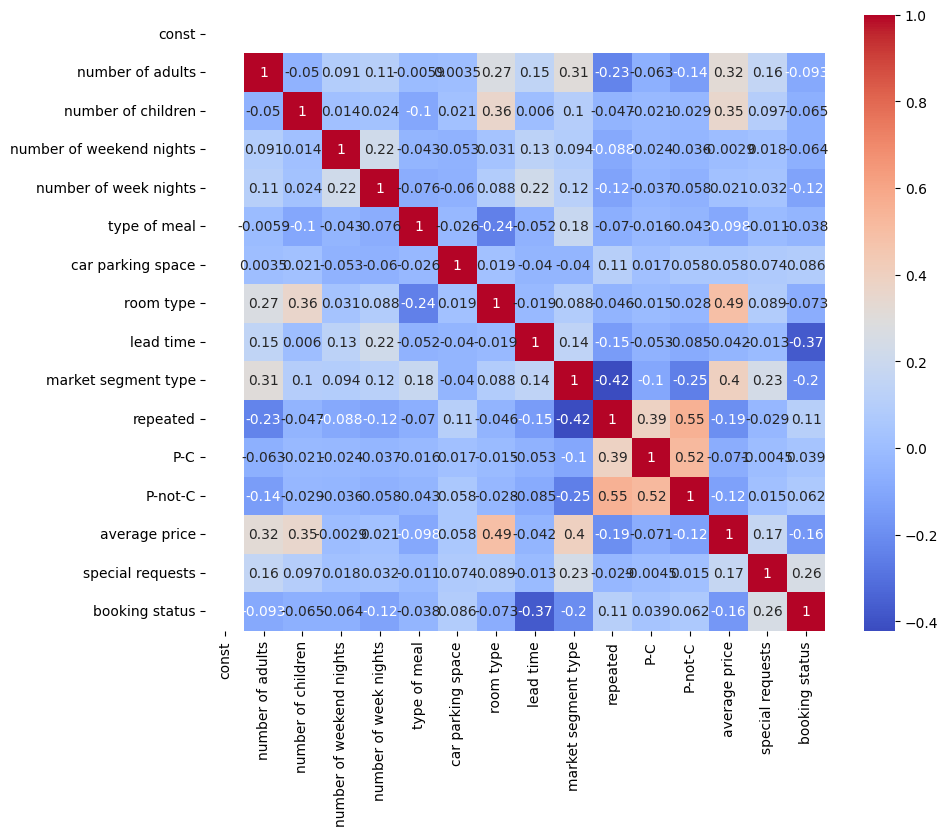

In [305]:


# Compute correlation
corr = X_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


SKEWNESS

In [306]:
skewness = X_numeric.skew()

In [307]:
skewness

const                        0.000000
number of adults            -0.315304
number of children           4.140850
number of weekend nights     0.628358
number of week nights        1.525059
type of meal                 1.663809
car parking space            4.583849
room type                    1.387158
lead time                    1.406935
market segment type         -2.342116
repeated                     5.377580
P-C                         22.499544
P-not-C                     16.739726
average price                0.602217
special requests             0.930959
booking status              -0.942405
dtype: float64

IT IS VISIBLE THAT P-C AND P-NOT-C IS HIGHLY SKEWED 

In [308]:
for col in X_numeric.columns:
    if skewness[col] > 5:
        X_numeric[col] = np.log1p( X_numeric[col])

In [309]:
skewness = X_numeric.skew()

In [310]:
skewness

const                        0.000000
number of adults            -0.315304
number of children           4.140850
number of weekend nights     0.628358
number of week nights        1.525059
type of meal                 1.663809
car parking space            4.583849
room type                    1.387158
lead time                    1.406935
market segment type         -2.342116
repeated                     5.377580
P-C                         13.234569
P-not-C                      7.764132
average price                0.602217
special requests             0.930959
booking status              -0.942405
dtype: float64

IMBALANCE

In [311]:
train["booking status"].value_counts()

booking status
1    15210
0     6119
Name: count, dtype: int64

In [312]:
train.drop(columns=["date of reservation"] , inplace=True)

In [313]:
X = train.drop( columns=["booking status"])
Y = train["booking status"]

In [314]:
Y

387      0
7768     0
11792    0
7978     0
10670    0
        ..
1685     0
16023    1
21962    1
16850    1
15795    1
Name: booking status, Length: 21329, dtype: int64

In [315]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [316]:
Y.value_counts()

booking status
1    15210
0     6119
Name: count, dtype: int64

In [317]:
from imblearn.over_sampling import SMOTE

In [318]:
smote = SMOTE( random_state=42)

In [319]:
train.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'booking status'],
      dtype='str')

In [320]:
X_res , Y_res = smote.fit_resample(X,Y)

In [321]:
Y_res.value_counts()

booking status
0    15210
1    15210
Name: count, dtype: int64

In [322]:
train.shape

(21329, 15)

In [323]:
balanced_df  = pd.DataFrame(X_res , columns = X.columns)

In [324]:
balanced_df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests'],
      dtype='str')

In [325]:
balanced_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests
0,3,0,1,3,0,0,3,155,4,0,0,0,115.600000,1
1,1,0,2,2,0,0,3,48,4,0,0,0,149.400000,0
2,2,0,1,2,0,0,0,305,3,0,0,0,89.000000,0
3,1,0,0,2,0,0,0,102,4,0,0,0,86.400000,2
4,2,2,1,2,0,0,5,9,4,0,0,0,221.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30415,1,0,1,1,0,0,0,59,4,0,0,0,142.767098,0
30416,2,0,0,2,0,0,3,10,4,0,0,0,130.356086,0
30417,2,0,0,0,3,0,0,9,4,0,0,0,89.000000,0
30418,2,0,0,0,2,0,0,101,3,0,0,0,108.000000,0


In [326]:
Y_res

0        0
1        0
2        0
3        0
4        0
        ..
30415    0
30416    0
30417    0
30418    0
30419    0
Name: booking status, Length: 30420, dtype: int64

In [327]:
balanced_df["booking_status"] = Y_res

In [328]:
balanced_df["booking_status"]

0        0
1        0
2        0
3        0
4        0
        ..
30415    0
30416    0
30417    0
30418    0
30419    0
Name: booking_status, Length: 30420, dtype: int64

In [329]:
balanced_df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking_status
0,3,0,1,3,0,0,3,155,4,0,0,0,115.6,1,0
1,1,0,2,2,0,0,3,48,4,0,0,0,149.4,0,0
2,2,0,1,2,0,0,0,305,3,0,0,0,89.0,0,0
3,1,0,0,2,0,0,0,102,4,0,0,0,86.4,2,0
4,2,2,1,2,0,0,5,9,4,0,0,0,221.0,0,0


In [330]:
balanced_df["booking_status"].value_counts()

booking_status
0    15210
1    15210
Name: count, dtype: int64

In [331]:
df = balanced_df.copy()

CLASSIFICATION

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
X = df.drop( columns = "booking_status")
y = df["booking_status"]

In [334]:
model = RandomForestClassifier()

In [335]:
model.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [336]:
feature_importance = model.feature_importances_

In [337]:
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "important": feature_importance
})

In [338]:
feature_importance_df

,feature,important
0,number of adults,0.019023
1,number of children,0.007679
2,number of weekend nights,0.030465
3,number of week nights,0.055079
4,type of meal,0.019428
5,car parking space,0.013392
6,room type,0.020937
7,lead time,0.343253
8,market segment type,0.058915
9,repeated,0.006610


In [339]:
feature_importance_df.sort_values( by = "important" , ascending = False )

,feature,important
7,lead time,0.343253
12,average price,0.233482
13,special requests,0.187713
8,market segment type,0.058915
3,number of week nights,0.055079
2,number of weekend nights,0.030465
6,room type,0.020937
4,type of meal,0.019428
0,number of adults,0.019023
5,car parking space,0.013392


In [340]:
top_feature_importance_df  = feature_importance_df.sort_values( by = "important" , ascending = False )

In [341]:
top_10_features = top_feature_importance_df["feature"].head(10).values

In [342]:
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [343]:
top_10_df.head()

,lead time,average price,special requests,market segment type,number of week nights,number of weekend nights,room type,type of meal,number of adults,car parking space,booking_status
0,155,115.6,1,4,3,1,3,0,3,0,0
1,48,149.4,0,4,2,2,3,0,1,0,0
2,305,89.0,0,3,2,1,0,0,2,0,0
3,102,86.4,2,4,2,0,0,0,1,0,0
4,9,221.0,0,4,2,1,5,0,2,0,0


In [344]:
df = top_10_df.copy()

MODEL SELECTION

In [345]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [346]:
# Standard imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)

In [347]:
X = df.drop( columns = "booking_status")
y = df["booking_status"]

In [348]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42)

In [349]:
# Define models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [350]:
metrics = {
    "model" :[],
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}


In [351]:
for model_name , classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test,y_pred)

    metrics["model"].append(model_name)
    metrics["accuracy"].append(accuracy_score)
    metrics["precision"].append(precision_score)
    metrics["recall"].append(recall_score)
    metrics["f1_score"].append(f1_score)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12174, number of negative: 12162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 24336, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500247 -> initscore=0.000986
[LightGBM] [Info] Start training from score 0.000986


In [352]:
metrics_df = pd.DataFrame(metrics)

In [353]:
metrics_df

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
1,Decision Tree,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
2,Random Forest,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
3,Gradient Boosting,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
4,AdaBoost,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
5,SVC,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
6,Gaussian NB,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
7,K-Nearest Neighbors,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
8,XGBoost,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
9,LightGBM,<function accuracy_score at 0x000002B35E729300>,<function precision_score at 0x000002B35E72A2A0>,<function recall_score at 0x000002B35E72A3E0>,<function f1_score at 0x000002B35E729BC0>
